# Анализ бизнес показателей приложения Procrastinate Pro+

Необходимо провести анализ бизнес показателей приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цели проекта:**
- Разобраться в причинах, по которым компания терпит убытки, несмотря на большие маркетинговые расходы.
- Дать рекомендации отделу маркетинга для того, чтобы компания начала генерировать прибыль.

**Исходные данные**<br>
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Ход исследования**

**Шаг 1. Загрузка данных и подготовка к анализу.**<br>
**Шаг 2. Функции для расчета LTV, ROI, удержания и конверсии.**<br>
**Шаг 3. Исследовательский анализ данных.**
- Анализ профилей пользователей.
- Анализ пользователей в разрезе стран.
- Анализ пользователей в разрезе устройств. 
- Анализ пользователей в разрезе каналов привлечения.<br>

**Шаг 4. Маркетинг.**<br>
- Расчет общих расходов на маркетинг.
- Распределение рекламных расходов по каналам.
- Анализ динамики изменения расходов на маркетинг.
- Расчет стоимости привлечения одного пользователя.<br>

**Шаг 5. Оценка окупаемости рекламы.**<br>
С помощью показателей LTV, ROI, CAC, конверсии и удержания проанализировать:
- Окупаемость рекламы в целом.
- Окупаемость рекламы в разрезе стран/каналов/устройств.<br>

В результате анализа ответить на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?<br>

**Шаг 6. Результаты исследования.**
- Причины неэффективности привлечения пользователей.
- Рекомендации для отдела маркетинга.

**Оглавление**
<a id='section_id7'></a>
1. [Загрузка данных и подготовка к анализу](#section_id1)
2. [Функции для расчета LTV, ROI, удержания и конверсии](#section_id2)
3. [Исследовательский анализ данных](#section_id3)
4. [Маркетинг](#section_id4)
5. [Оценка окупаемости рекламы](#section_id5)
6. [Результаты исследования](#section_id6)

## Загрузка данных и подготовка к анализу
<a id='section_id1'></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.3f}'.format # установим удобный формат отображения чисел

In [3]:
# загрузим данные
visits, orders, costs = (
    pd.read_csv('datasets/visits_info_short.csv'), # визиты
    pd.read_csv('datasets/orders_info_short.csv'), # заказы
    pd.read_csv('datasets/costs_info_short.csv') # расходы
)

### Обзор данных

In [4]:
visits.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [5]:
visits.info()
visits.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


(309901, 6)

In [6]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52    4.990
1  174361394180  2019-05-01 12:24:04    4.990
2  529610067795  2019-05-01 11:34:04    4.990
3  319939546352  2019-05-01 15:34:40    4.990
4  366000285810  2019-05-01 13:59:51    4.990

In [7]:
orders.info()
orders.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


(40212, 3)

In [8]:
costs.head()

dt   Channel   costs
0  2019-05-01  FaceBoom 113.300
1  2019-05-02  FaceBoom  78.100
2  2019-05-03  FaceBoom  85.800
3  2019-05-04  FaceBoom 136.400
4  2019-05-05  FaceBoom 122.100

In [9]:
costs.info()
costs.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


(1800, 3)

### Предобработка данных

1. Таблица visits: переименуем колонки, приведем в формат дат колонки со временем начала и окончания сессий, проверим на явные дубликаты;<br>
2. Таблица orders: переименуем колонки, приведем в формат даты колонку со временем покупки, проверим на явные дубликаты;<br>
3. Таблица costs: переименуем колонки, приведем в формат даты колонку со временем проведения рекламной компании, проверим на явные дубликаты.

`Visits`

In [10]:
# переименуем колонки таблицы visits в удобный формат
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [11]:
print(visits.duplicated().sum()) # проверим на наличие явных дубликатов

0


In [12]:
# изменим тип данных времени начала и конца сессии на формат даты и выполним проверку
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


`Orders`

In [13]:
# переименуем колонки таблицы orders в удобный формат
orders.columns = ['user_id', 'event_dt', 'revenue']

In [14]:
print(orders.duplicated().sum()) # проверим на наличие явных дубликатов

0


In [15]:
# изменим тип данных времени заказа на формат даты
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


`Costs`

In [16]:
# переименуем колонки таблицы costs в удобный формат
costs.columns = ['dt', 'channel', 'costs']

In [17]:
print(costs.duplicated().sum()) # проверим на наличие явных дубликатов

0


In [18]:
# изменим тип данных даты проведения рекламной компании на формат даты
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Выводы:**
- Привели все названия колонок к нижнему регистру, пробелы в названиях заменили на "_".
- Изменили формат в колонках, которые содержат дату.
- Проверили на явные дубликаты - не обнаружено.<br>

[Оглавление](#section_id7)

## Функции для расчета LTV, ROI, удержания и конверсии
<a id='section_id2'></a>

**`get_profiles()` для создания профилей пользователей**

In [19]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    #profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


**`get_retention()` для подсчёта Retention Rate**

In [20]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**`get_conversion()` для подсчёта конверсии**

In [21]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**`get_ltv()` для подсчёта LTV**

In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**`filter_data()` для сглаживания данных**

In [23]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**`plot_retention()` для построения графика Retention Rate**

In [24]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**`plot_conversion()` для построения графика конверсии**

In [25]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**`plot_ltv_roi` для визуализации LTV и ROI**

In [26]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

[Оглавление](#section_id7)

## Исследовательский анализ данных
<a id='section_id3'></a>

### Профили пользователей

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

In [27]:
profiles = get_profiles(visits, orders, costs) # получаем профили пользователей
observation_date = profiles['dt'].max() # установим момент анализа данных
horizon_days = 14 # установим горизонт анализа 14 дней, т.к. в этот срок пользователь должен окупаться
print('Минимальная дата привлечения пользователей', profiles['dt'].min())
print('Максимальная дата привлечения пользователей', profiles['dt'].max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


In [28]:
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt  payer  acquisition_cost  
0  2019-05-07   True             1.088  
1  2019-07-09  False             1.107  
2  2019-10-01  False             0.000  
3  2019-08-22  False             0.988  
4  2019-10-02  False             0.231

**Пользователи по странам**

In [29]:
# выведем информацию о числе пользователей в разрезе стран и долю плательщиков
display(profiles.groupby('region').agg({'user_id':'nunique', 'payer':'mean'})
                .sort_values(by='payer', ascending=False).reset_index())

region  user_id  payer
0  United States   100002  0.069
1        Germany    14981  0.041
2             UK    17575  0.040
3         France    17450  0.038

**Выводы:**
- Пользователи нашего приложения находятся в 4 странах: США, Германии, Великобритании и Франции.
- Основная часть находится в США (100 тыс. пользователей), там же самая высокая доля платящих пользователей - 6,9%.
- Доля платящих пользователей в остальных странах значительно ниже - в пределах 3,8-4,1%.

### Пользователи по используемым устройствам

In [30]:
# выведем информацию о числе пользователей в разрезе устройств и долю плательщиков
display(profiles.groupby('device').agg({'user_id':'nunique', 'payer':'mean'})
                .sort_values(by='payer', ascending=False).reset_index())

device  user_id  payer
0      Mac    30042  0.064
1   iPhone    54479  0.062
2  Android    35032  0.059
3       PC    30455  0.050

**Выводы:**
- Самыми платящими являются пользователи, которые используют продукцию Apple (6,2-6,4%).
- Самые наименее платящие пользователи PC.
- Наибольшая доля пользователей использует Iphone - примерно 35%, остальные пользователи примерно равномерно распределены между Mac, Android и PC.

### Пользователи по каналам привлечения

In [31]:
# выведем информацию о числе пользователей в разрезе каналов привлечения и долю плательщиков
display(profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'mean'})
                .sort_values(by='payer', ascending=False).reset_index())

channel  user_id  payer
0             FaceBoom    29144  0.122
1           AdNonSense     3880  0.113
2       lambdaMediaAds     2149  0.105
3               TipTop    19561  0.096
4       RocketSuperAds     4448  0.079
5       WahooNetBanner     8553  0.053
6              YRabbit     4312  0.038
7         MediaTornado     4364  0.036
8              LeapBob     8553  0.031
9   OppleCreativeMedia     8605  0.027
10             organic    56439  0.021

**Выводы:**
- Всего компания использует 11 источников для привлечения пользователей: 10 платных и 1 органический.
- Больше всего пользователей пришло органическим путем, но их конверсия в платящих наименьшая.
- FaceBoom и TipTop являются самыми крупными платными каналами, конверсия в платящих пользователей TipTop при этом несколько ниже - 9,6% против 12,2%.
- Также высокая доля платящих пользователей, которые пришли через канал AdNonSense и lambdaMediaAds.

[Оглавление](#section_id7)

## Маркетинг
<a id='section_id4'></a>

### Общая сумма расходов на маркетинг

In [32]:
print('Общие затраты на маркетинг составили {:.2f}'.format(costs['costs'].sum()))

Общие затраты на маркетинг составили 105497.30


### Распределение расходов на маркетинг по каналам

In [33]:
# посчитаем затраты по каналам
costs_by_channels = costs.groupby('channel').agg({'costs':'sum'})\
                        .sort_values(by='costs', ascending=False).reset_index()

# добавим колонку с долей затрат каждого канала
costs_by_channels['share'] = costs_by_channels['costs'] / costs['costs'].sum()

display(costs_by_channels)

channel      costs  share
0              TipTop 54,751.300  0.519
1            FaceBoom 32,445.600  0.308
2      WahooNetBanner  5,151.000  0.049
3          AdNonSense  3,911.250  0.037
4  OppleCreativeMedia  2,151.250  0.020
5      RocketSuperAds  1,833.000  0.017
6             LeapBob  1,797.600  0.017
7      lambdaMediaAds  1,557.600  0.015
8        MediaTornado    954.480  0.009
9             YRabbit    944.220  0.009

**Выводы:**
- Основными рекламными источниками являются TipTop и FaceBoom с общей долей около 82,5%.
- Лидером по затратам является TipTop с долей почти 52%. Стоит не забывать, что доля платящих пользователей TipTop меньше, чем у FaceBoom.

### Динамика расходов на маркетинг по каналам

In [34]:
# добавим новые столбцы с месяцем и неделей
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = pd.DatetimeIndex(costs['dt']).month
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

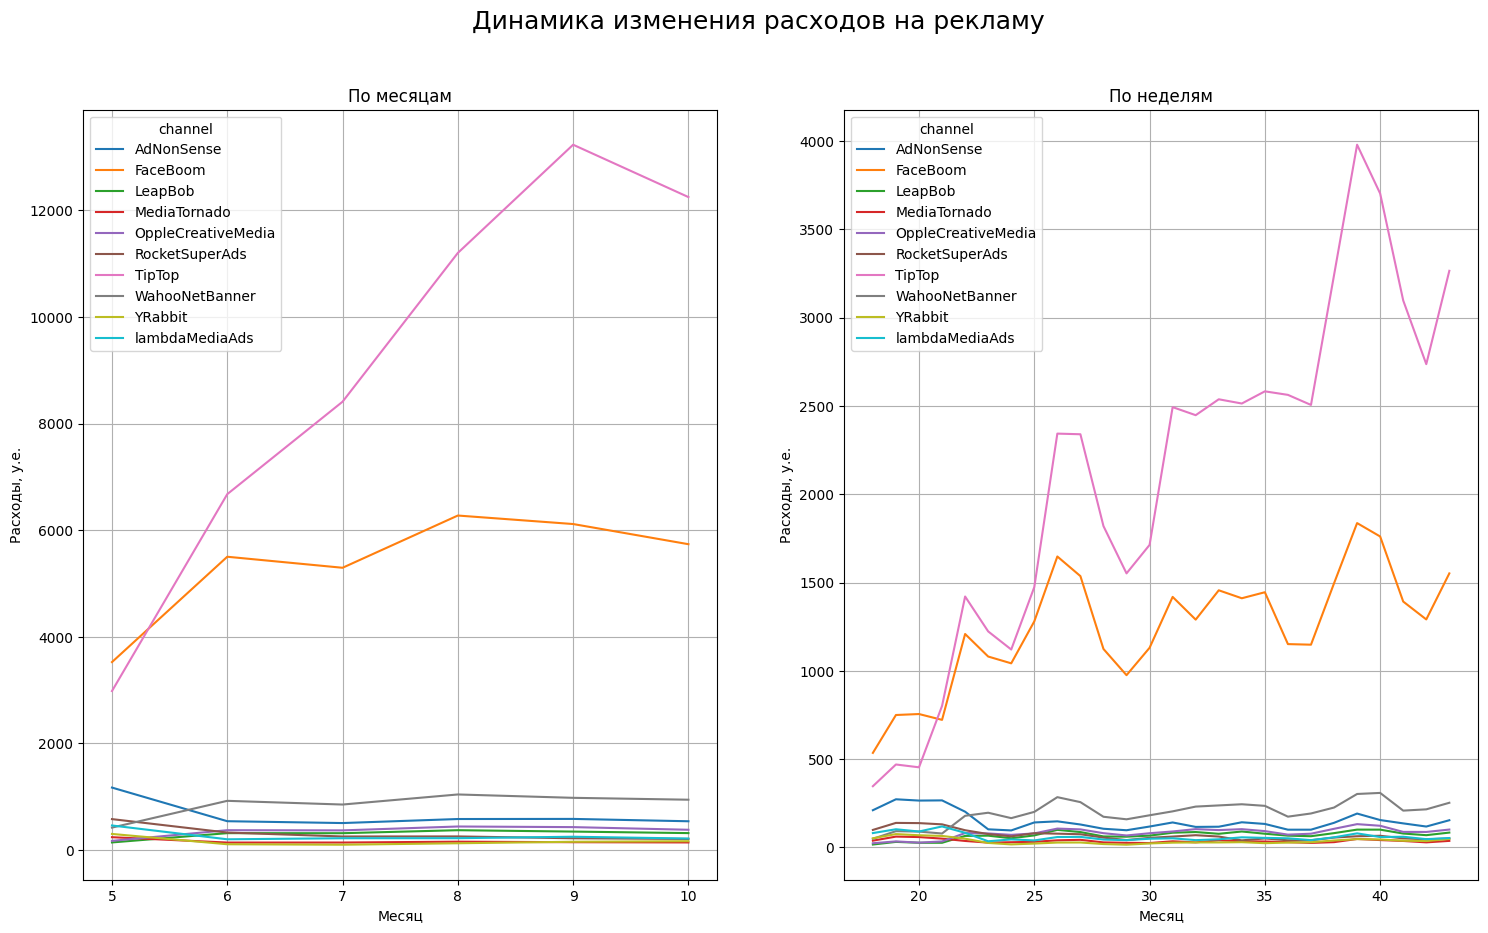

In [35]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('Динамика изменения расходов на рекламу', fontsize=18) 

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

(costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum')\
     .plot(ax=ax1, grid=True, figsize=(18,10), xlabel='Месяц', ylabel='Расходы, у.е.', title='По месяцам'))

(costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum')\
     .plot(ax=ax2,grid=True, figsize=(18,10), xlabel='Месяц', ylabel='Расходы, у.е.', title='По неделям'))

plt.show()

**Выводы:**
- График подтверждает превалирование двух источников расходов на маркетинг: FaceBoom и TipTop.
- По июль расходы на эти 2 компании были сопоставимы по размеру, но далее затраты на TipTop стали опережать FaceBoom. Учитывая разную долю платящих пользователей от этих двух каналов ожидалось бы увидеть обратную ситуацию. Этот вопрос необходимо проанализировать.

### Стоимость привлечения одного пользователя по каналам

In [36]:
print('Стоимость привлечения одного пользователя {:.2f}'.format(profiles['acquisition_cost']
                                                 .sum()/profiles.query('channel != "organic"')['user_id'].nunique()))

Стоимость привлечения одного пользователя 1.13


In [37]:
cac = profiles.groupby('channel').agg({'user_id': 'nunique', 'acquisition_cost' : 'sum'})\
                                 .reset_index()
cac['cost_per_user'] = cac['acquisition_cost'] / cac['user_id']
cac.sort_values(by='cost_per_user', ascending=False)

channel  user_id  acquisition_cost  cost_per_user
6               TipTop    19561        54,751.300          2.799
1             FaceBoom    29144        32,445.600          1.113
0           AdNonSense     3880         3,911.250          1.008
9       lambdaMediaAds     2149         1,557.600          0.725
7       WahooNetBanner     8553         5,151.000          0.602
5       RocketSuperAds     4448         1,833.000          0.412
4   OppleCreativeMedia     8605         2,151.250          0.250
8              YRabbit     4312           944.220          0.219
3         MediaTornado     4364           954.480          0.219
2              LeapBob     8553         1,797.600          0.210
10             organic    56439             0.000          0.000

**Выводы:**
- Самая дорогая стоимость привлечения пользователей через канал TipTop - она более, чем в 2 раза превышает стоимость привлечения через канал FaceBoom! При этом мы помним, что доля платящих пользователей канала FaceBoom больше, чем TipTop. Очередное подтверждение, что этот вопрос требует дополнительной проработки.
- Стоимость привлечения через каналы AdNonSense и lambdaMediaAds еще меньше, чем у двух лидеров, при этом доля платящих пользователей у них выше, чем у TipTop. Возможно эти каналы нуждаются в дополнительной проработке на предмет увеличения притока пользователей через них.

[Оглавление](#section_id7)

## Оценка окупаемости рекламы
<a id='section_id5'></a>

С помощью показателей LTV, ROI, CAC, конверсии и удержания проанализировать:
- Окупаемость рекламы в целом.
- Окупаемость рекламы в разрезе стран/каналов/устройств.<br>

В результате анализа ответить на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом?
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости?<br>

### Подготовка данных

Для дальнейшего анализа исключим пользователей, которые пришли органическим путем, т.к. этот канал не требует маркетингово бюджета.

In [38]:
profiles_wo_org = profiles.query('channel != "organic"')

In [39]:
# убедимся, что в списке каналов не осталось organic
profiles_wo_org['channel'].unique()

array(['FaceBoom', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [40]:
profiles_wo_org.head()

user_id            first_ts     channel   device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom   iPhone  United States   
3  22593348 2019-08-22 21:35:48  AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit   iPhone  United States   
7  46006712 2019-06-30 03:46:29  AdNonSense  Android         France   

           dt  payer  acquisition_cost  
0  2019-05-07   True             1.088  
1  2019-07-09  False             1.107  
3  2019-08-22  False             0.988  
4  2019-10-02  False             0.231  
7  2019-06-30   True             1.008

In [41]:
# посмотрим как распределился рекламный бюджет по странам и каналам
profiles_wo_org.groupby(['channel','region']).agg({'user_id':'count', 'acquisition_cost':'sum'})\
               .sort_values(by=['channel','region'],ascending=False).reset_index()

channel         region  user_id  acquisition_cost
0       lambdaMediaAds             UK      758           551.174
1       lambdaMediaAds        Germany      649           471.288
2       lambdaMediaAds         France      742           535.138
3              YRabbit  United States     4312           944.220
4       WahooNetBanner             UK     3003         1,808.890
5       WahooNetBanner        Germany     2579         1,552.973
6       WahooNetBanner         France     2971         1,789.137
7               TipTop  United States    19561        54,751.300
8       RocketSuperAds  United States     4448         1,833.000
9   OppleCreativeMedia             UK     3052           763.180
10  OppleCreativeMedia        Germany     2562           640.733
11  OppleCreativeMedia         France     2991           747.336
12        MediaTornado  United States     4364           954.480
13             LeapBob             UK     3046           639.608
14             LeapBob        Germany     2519           529.947
15             LeapBob         France     2988           628.046
16            FaceBoom  United States    29144        32,445.600
17          AdNonSense             UK     1295         1,305.651
18          AdNonSense        Germany     1219         1,229.283
19          AdNonSense         France     1366         1,376.317

**Выводы:**
- Львиная доля маркетингового бюджета направлена в каналы FaceBoom и TipTop, которые привлекают пользователей из США.
- В Европе действует одни каналы для привлечения пользователей, в США свои каналы. Полагаю, что эти каналы не взаимозаменяемы.

### Окупаемость рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

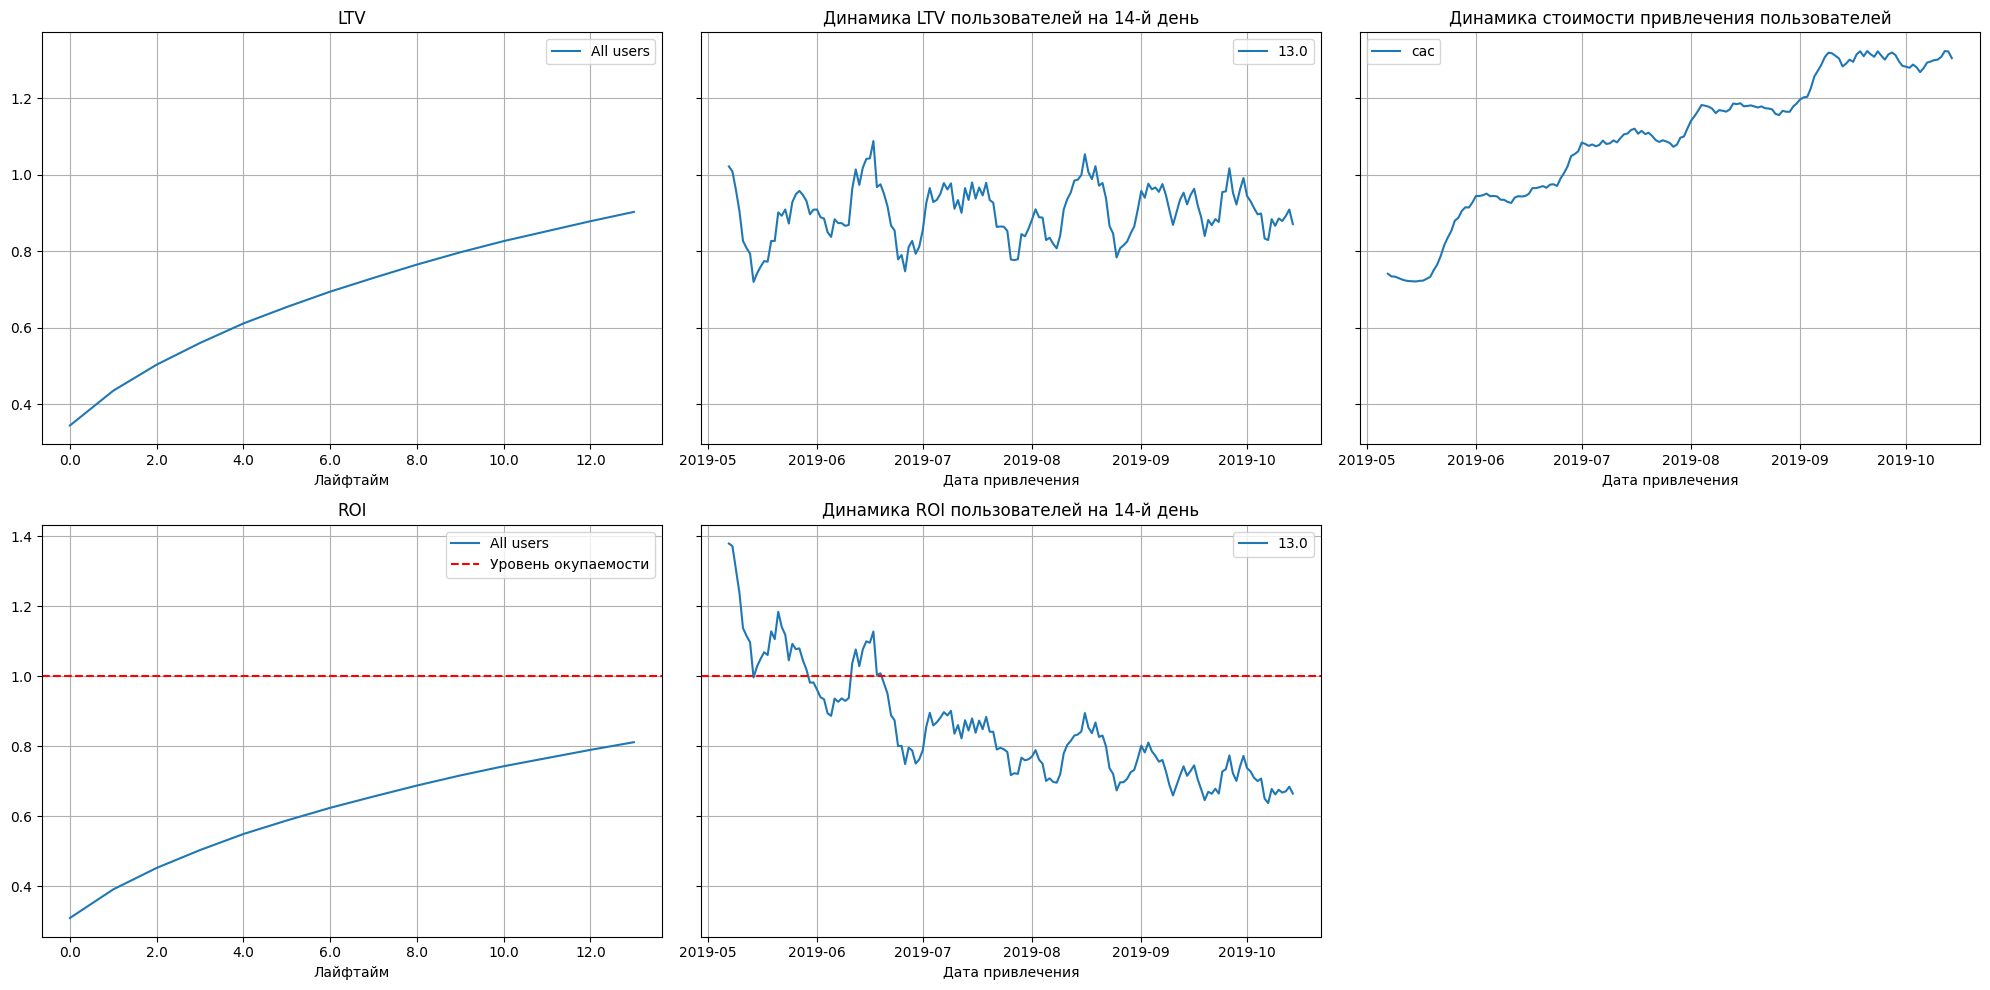

In [42]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Выводы:**
- График ROI подтверждает, что реклама не окупается. ROI к концу второй недели чуть больше 80%.
- Стоимость привлечения пользователя значительно выросла с мая.
- Динамика LTV находится примерно в одном диапазоне, наблюдается схожая динамика от месяца к месяцу.
- ROI снижается, т.к. при росте CAC не растет LTV.

### Окупаемость рекламы по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

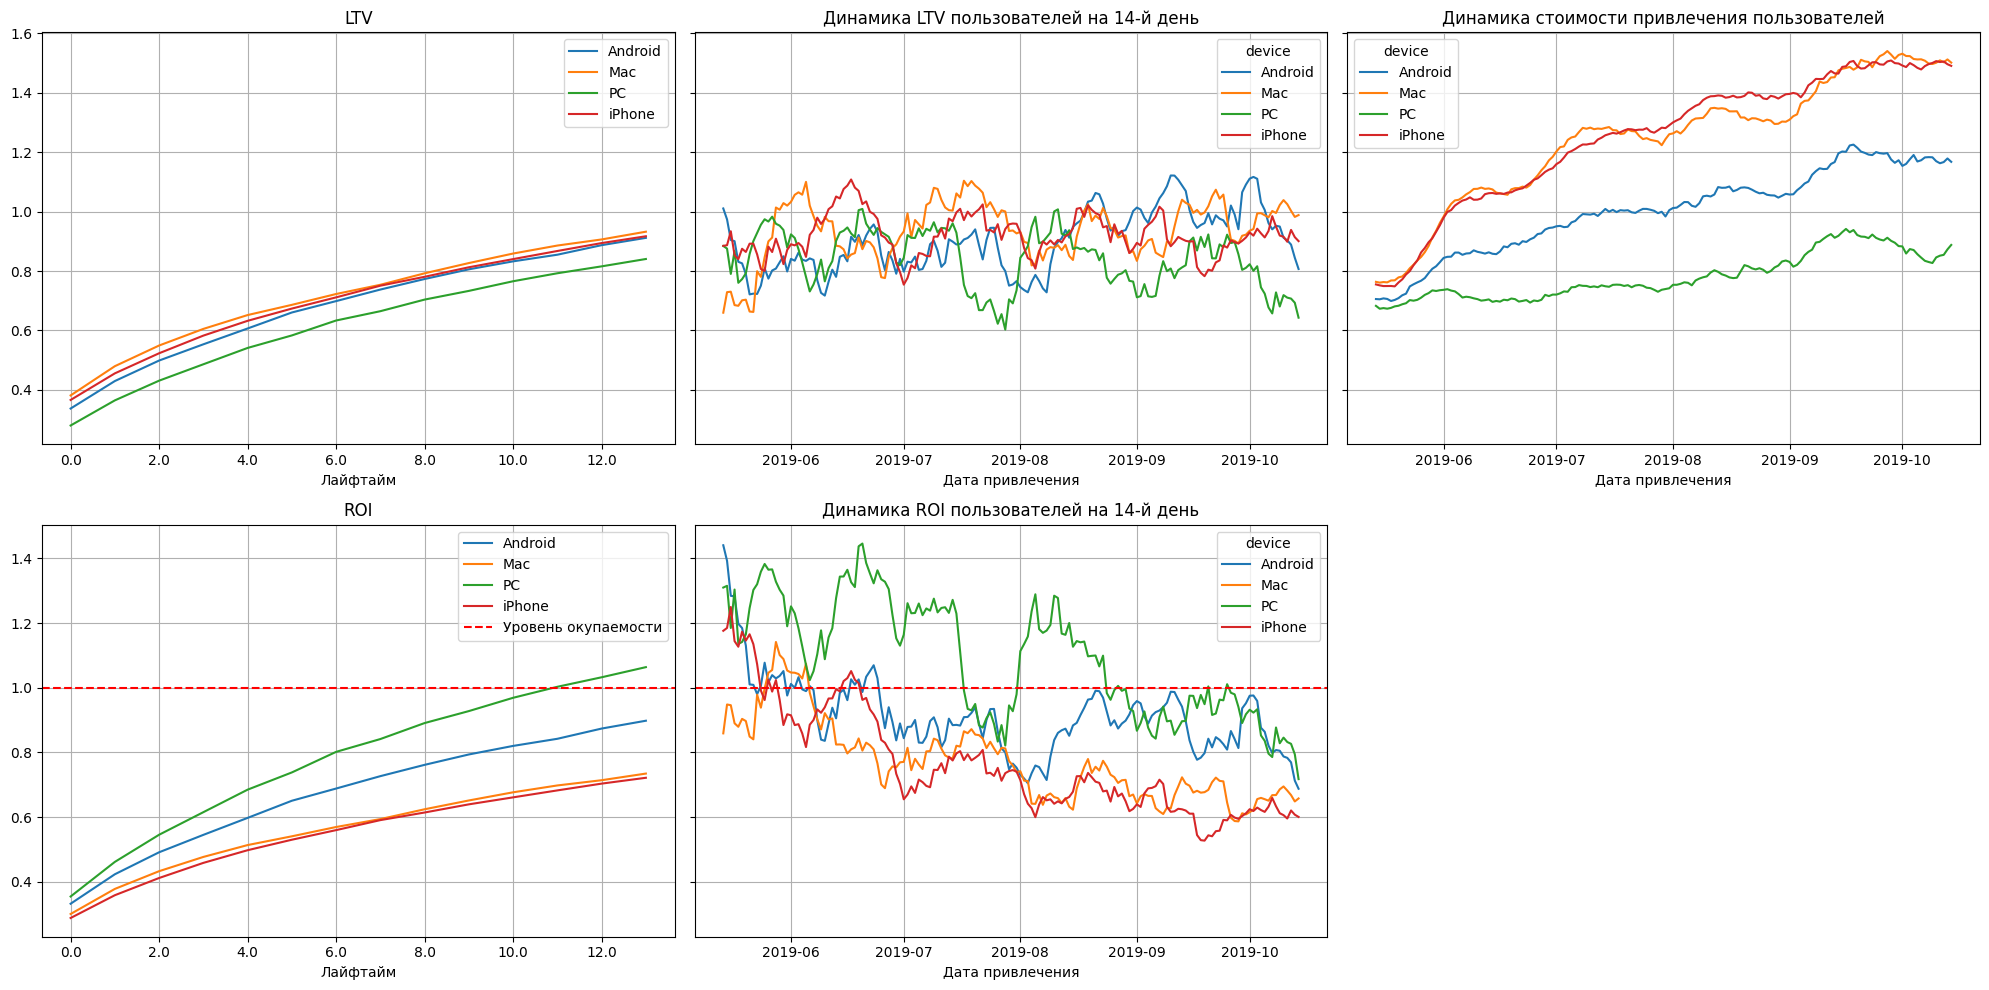

In [43]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

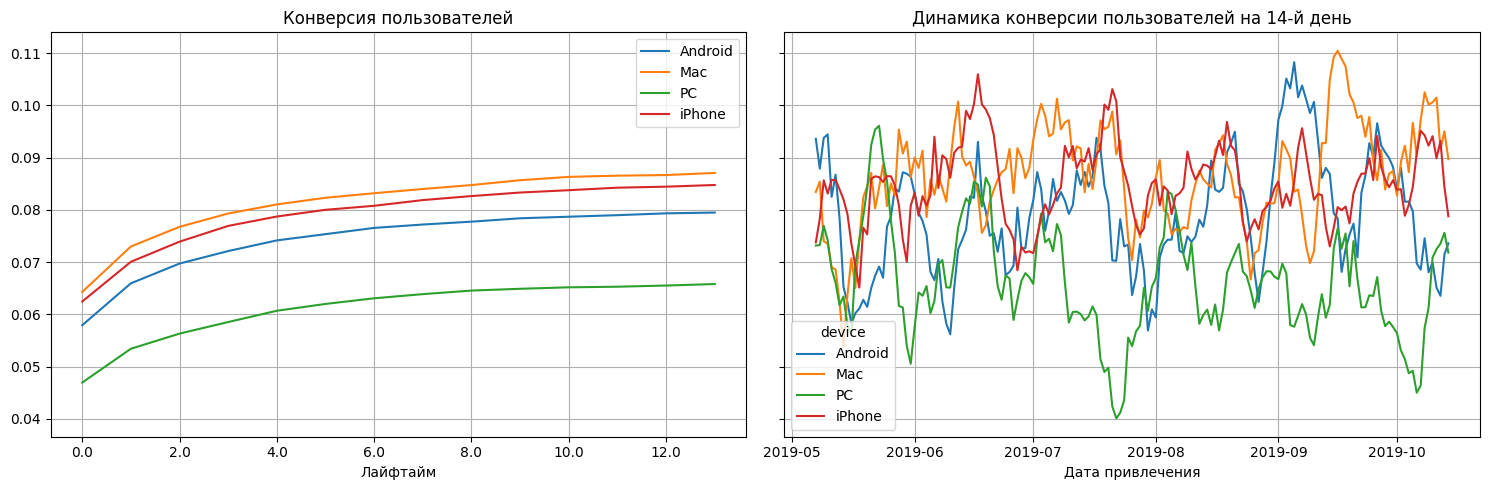

In [44]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

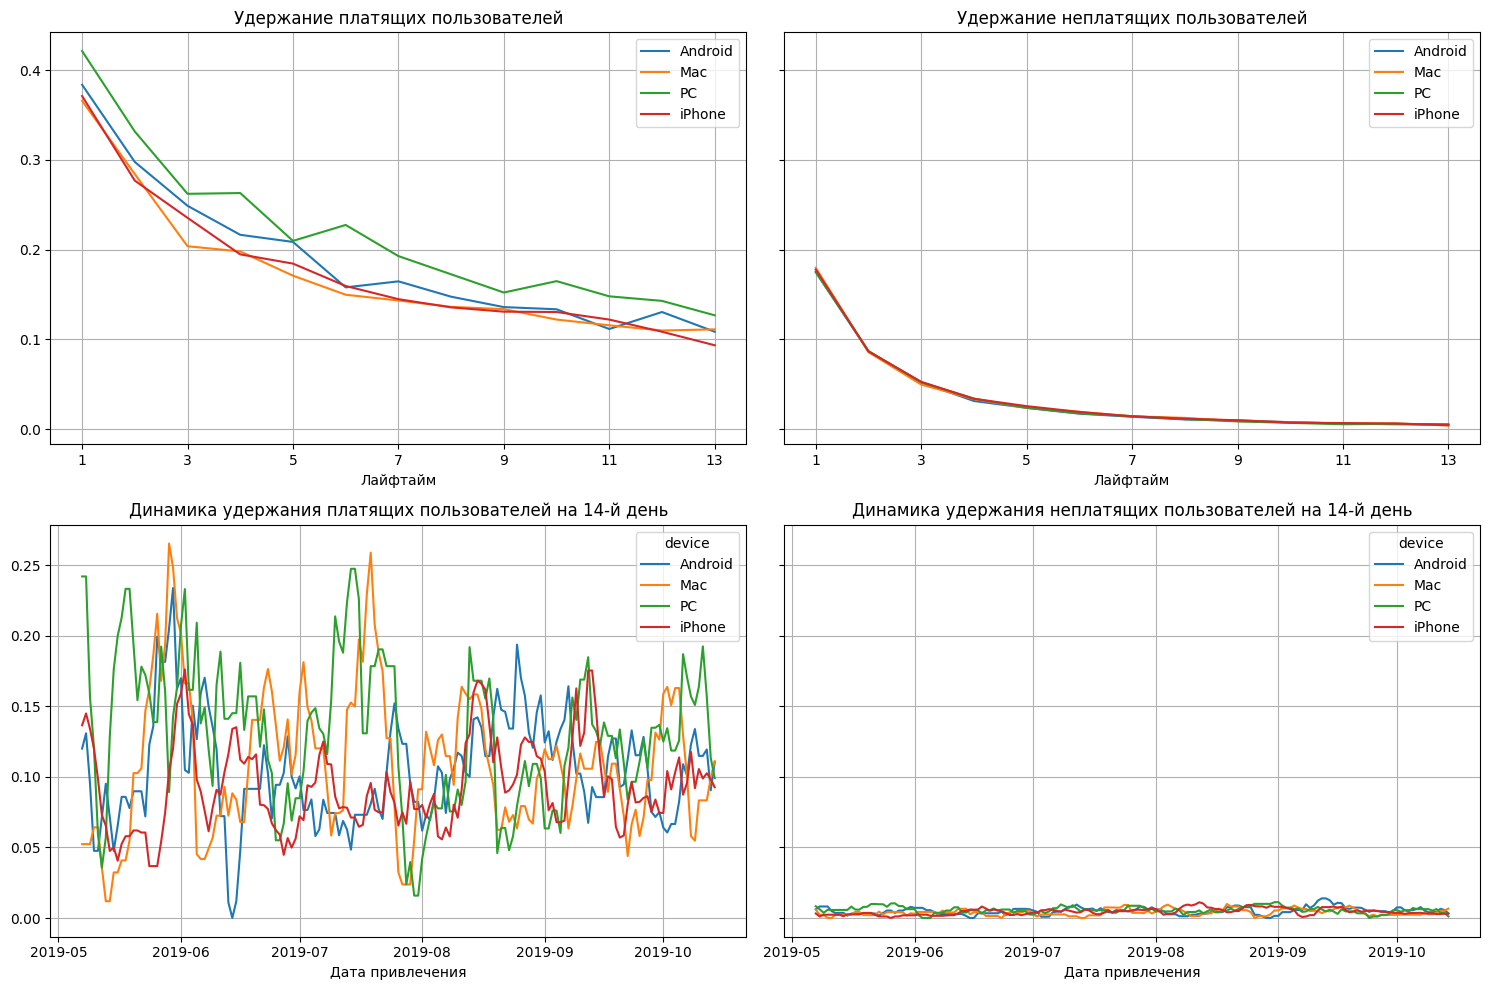

In [45]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**
- Инвестиции в рекламу окупаются только для пользователей PC.
- Стоимость привлечения пользователей на Iphone и Mac растет значительно больше, чем на PC и Android.
- LTV пользователей PC самое низкое, на 3 других устройствах примерно на одном уровне.

### Окупаемость рекламы по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

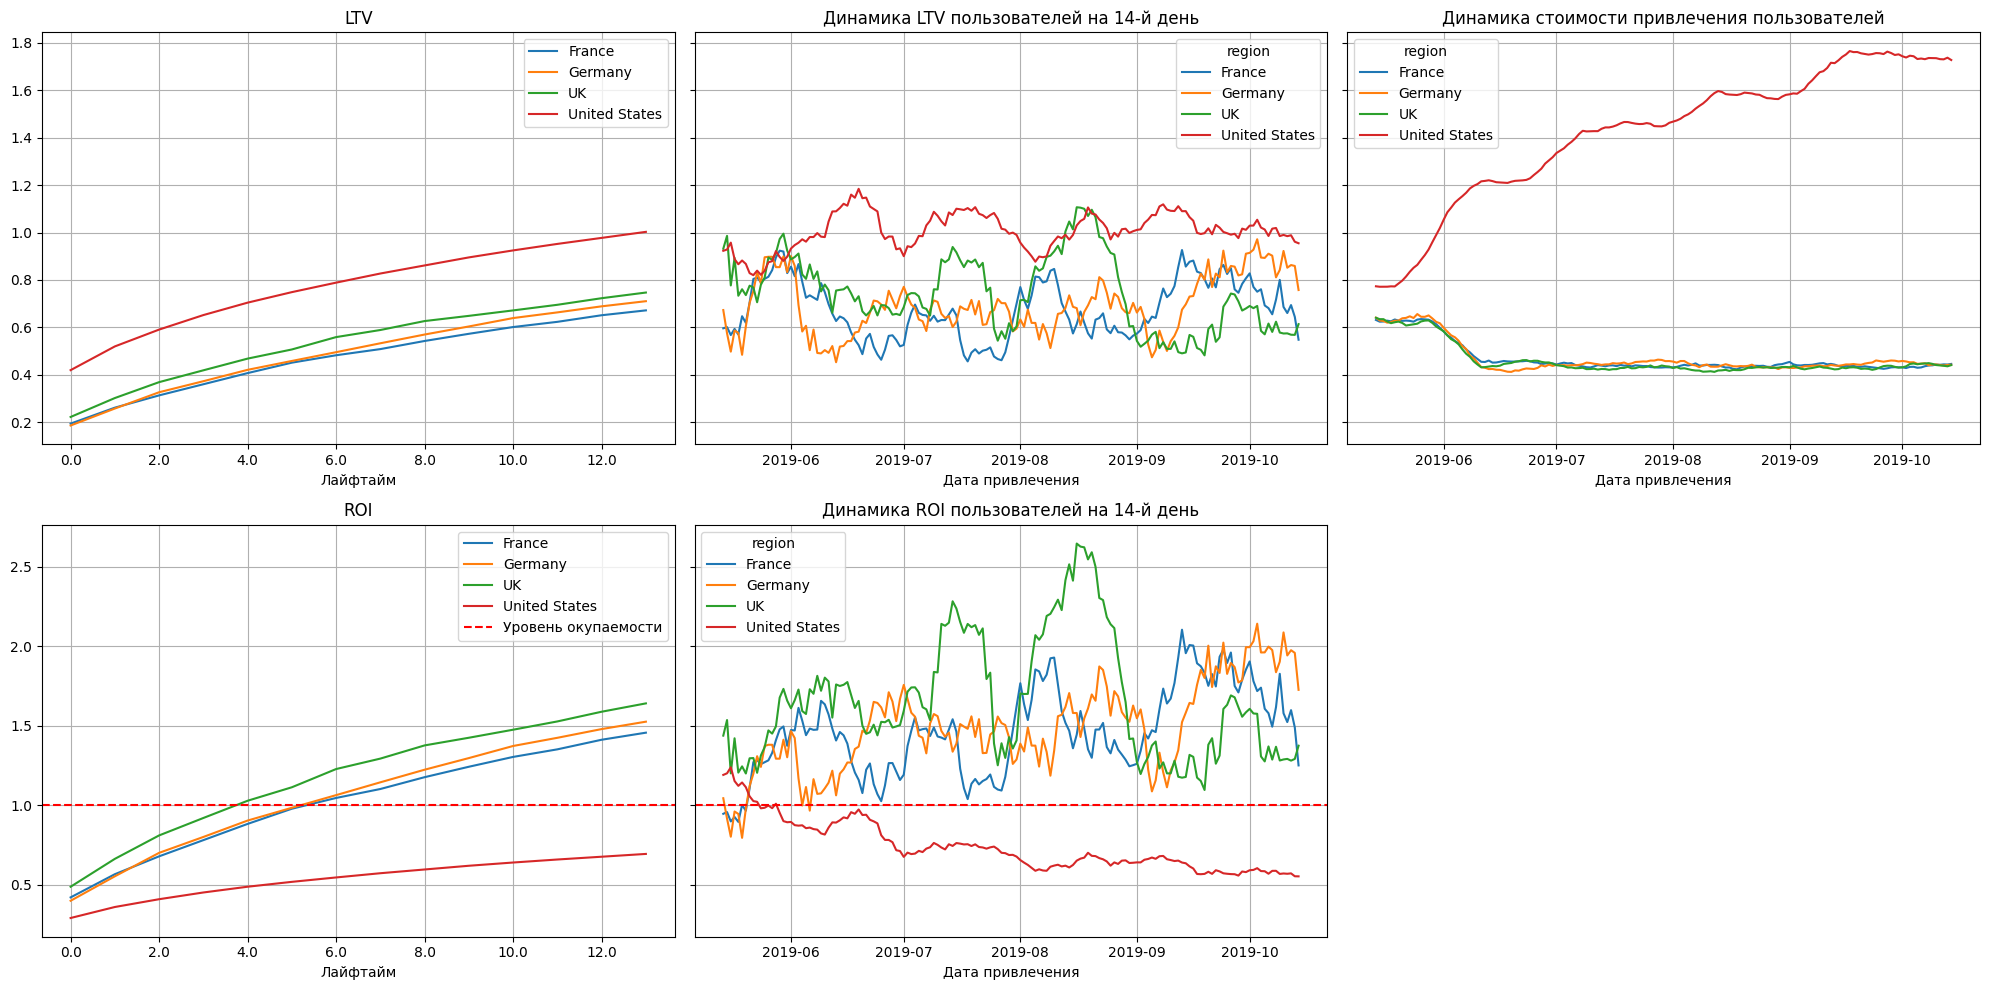

In [46]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

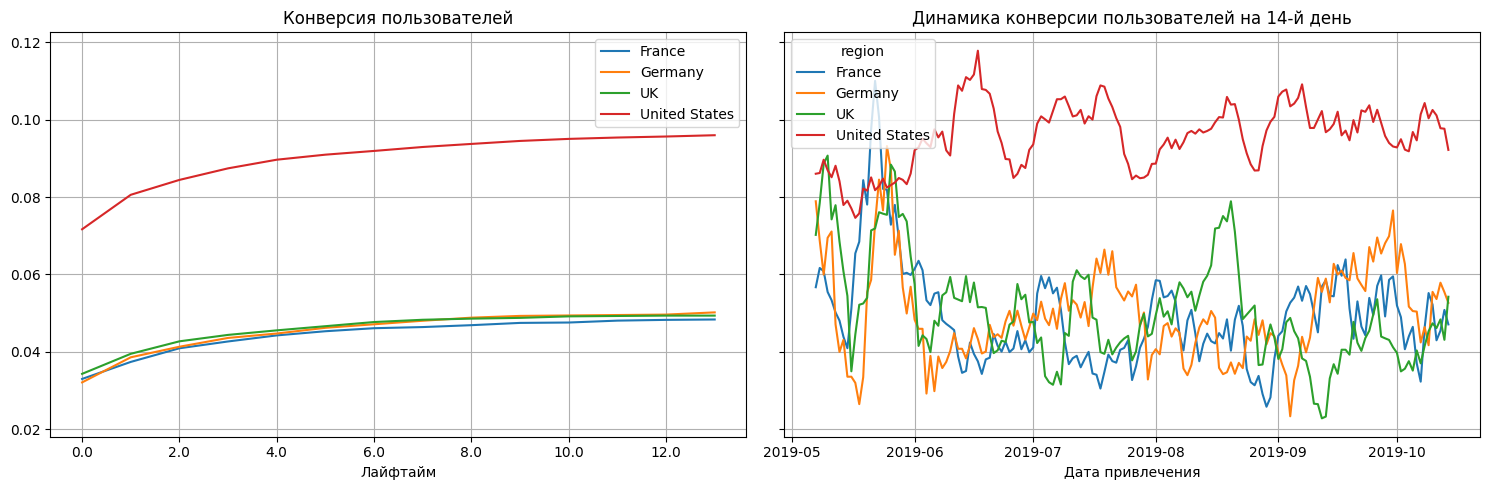

In [47]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

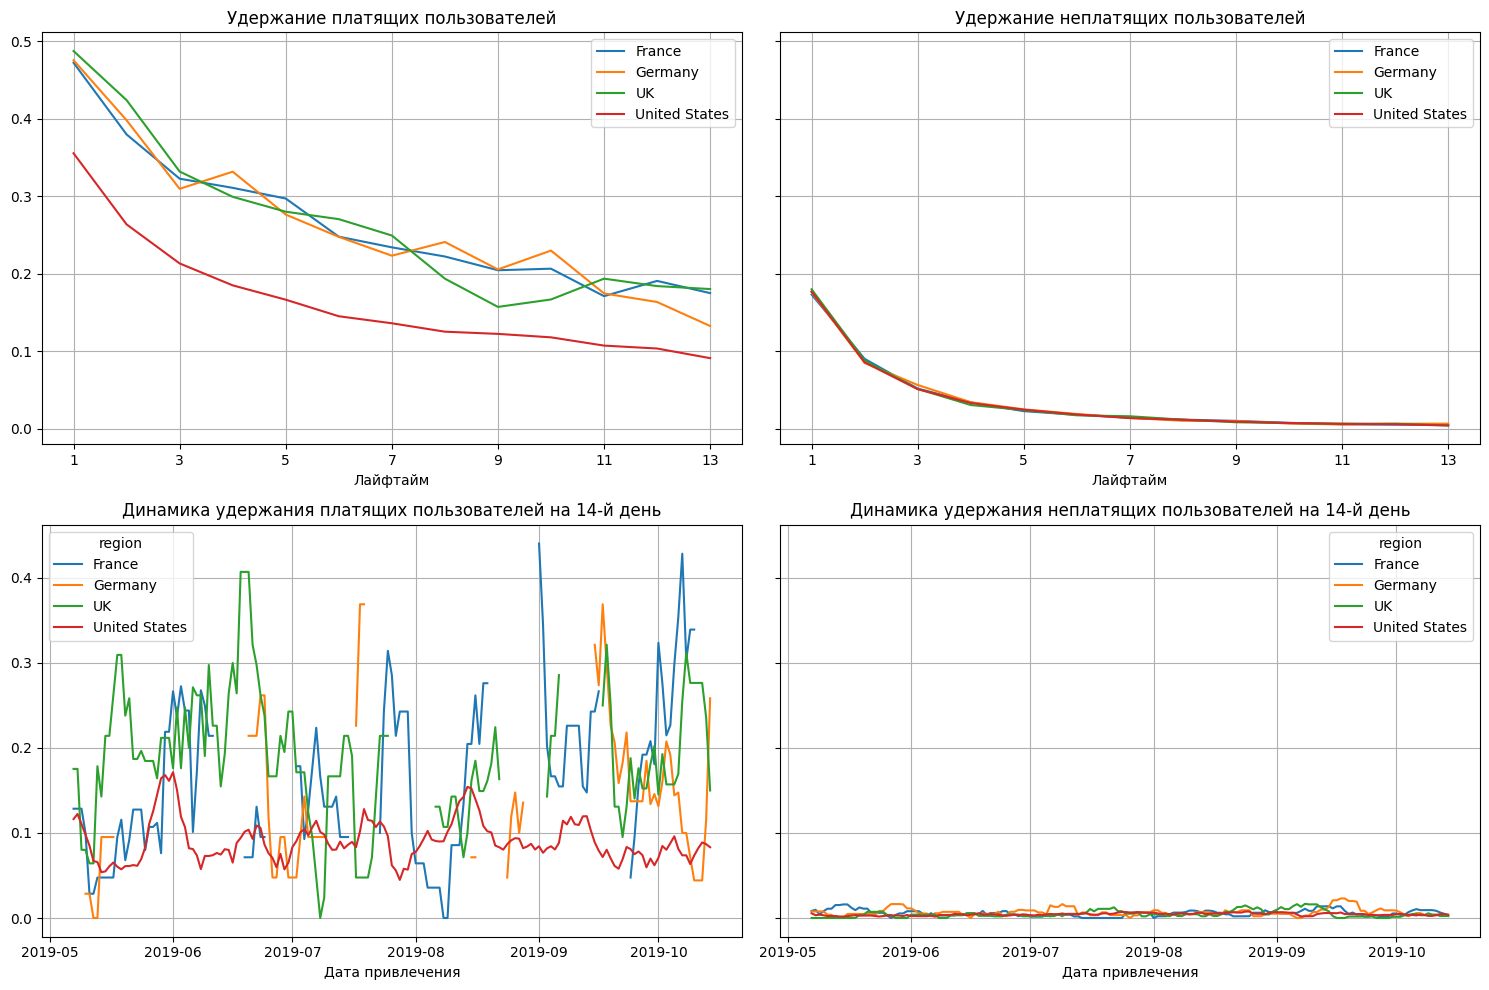

In [48]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**
- США - единственная страна, инвестиции в рекламу которой не окупаются. По всем остальным странам ROI > 1 уже с 6 дня.
- В США самая высокая конверсия и самое низкое удержание платящих пользователей.

### Окупаемость рекламы по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

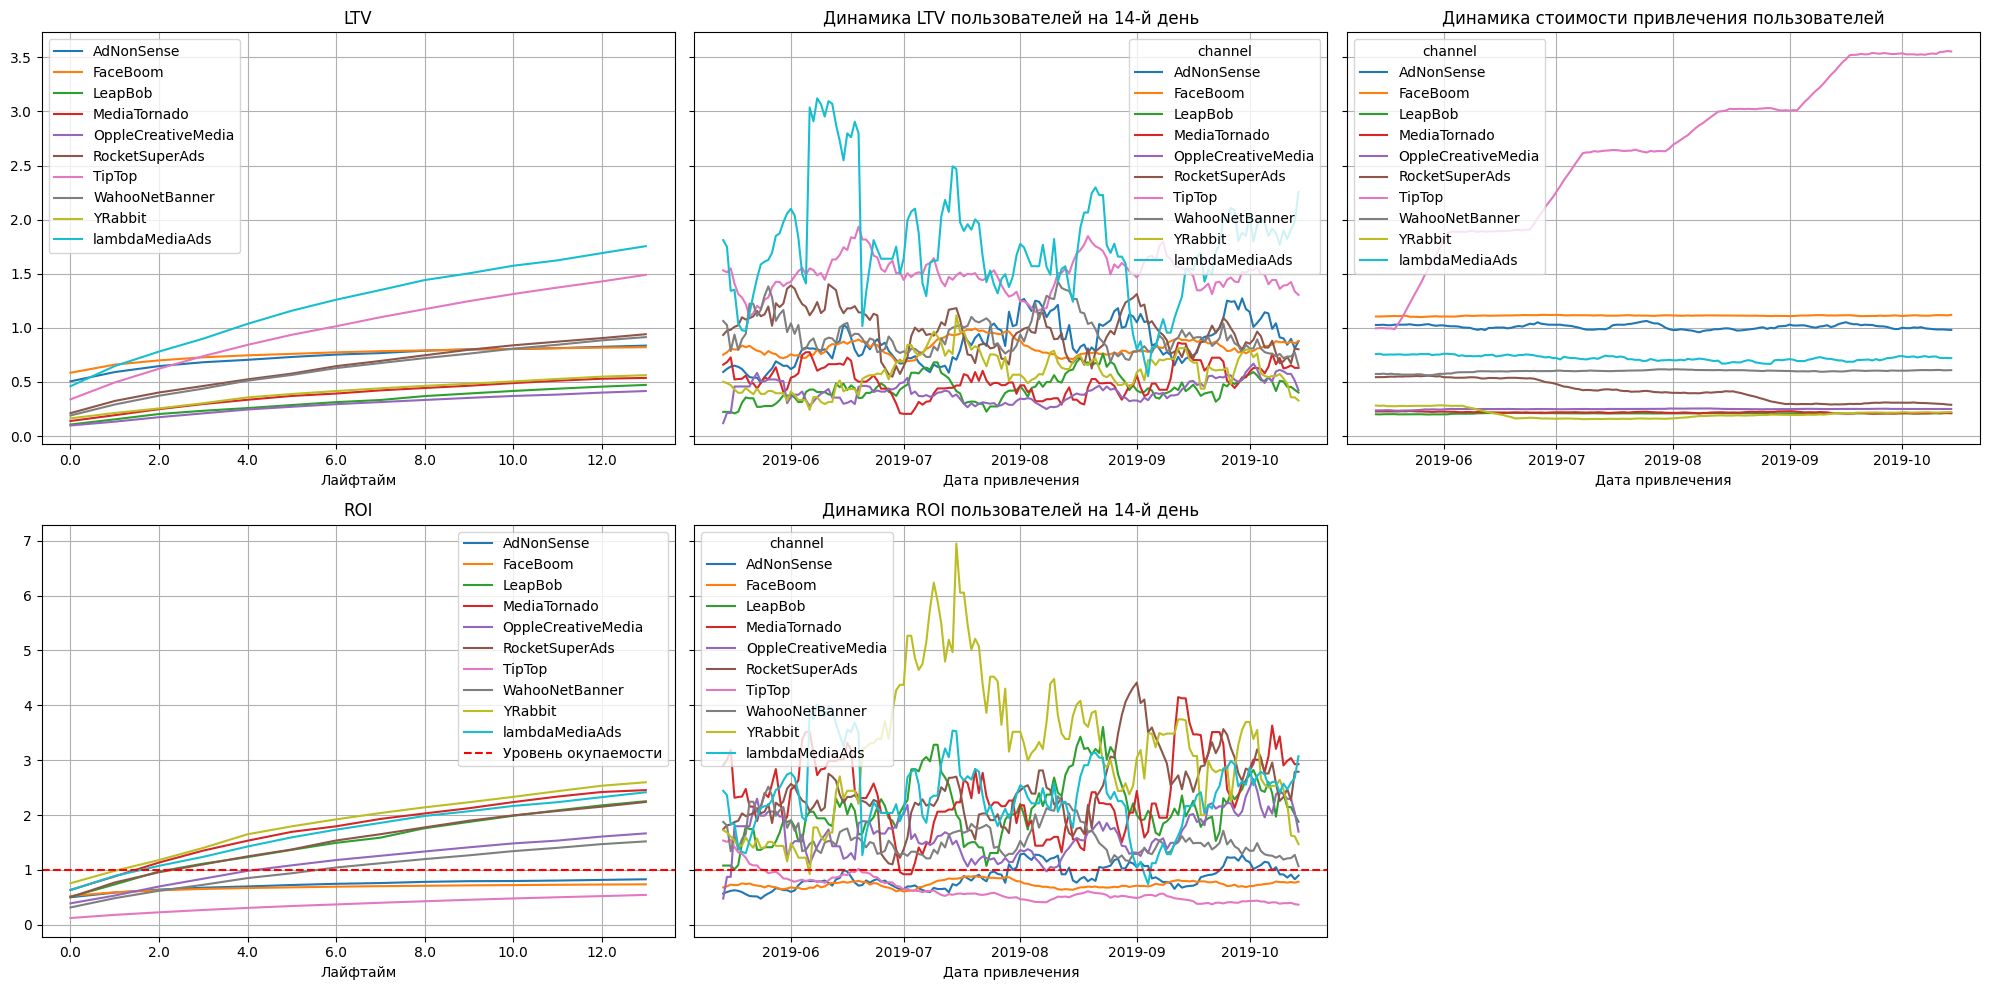

In [49]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

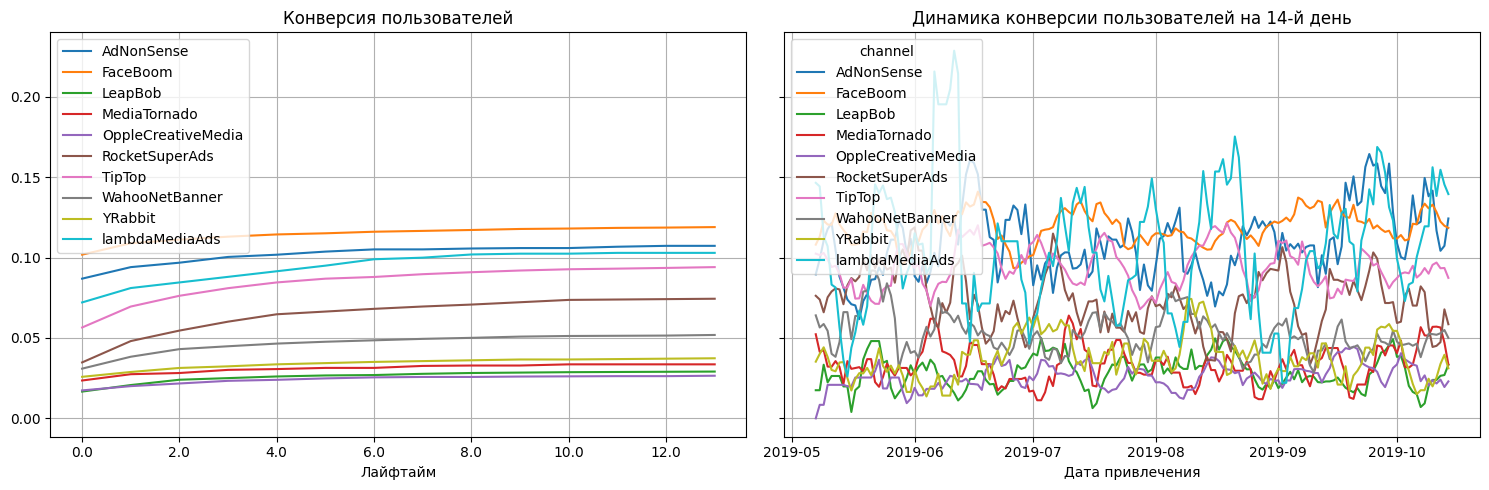

In [50]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

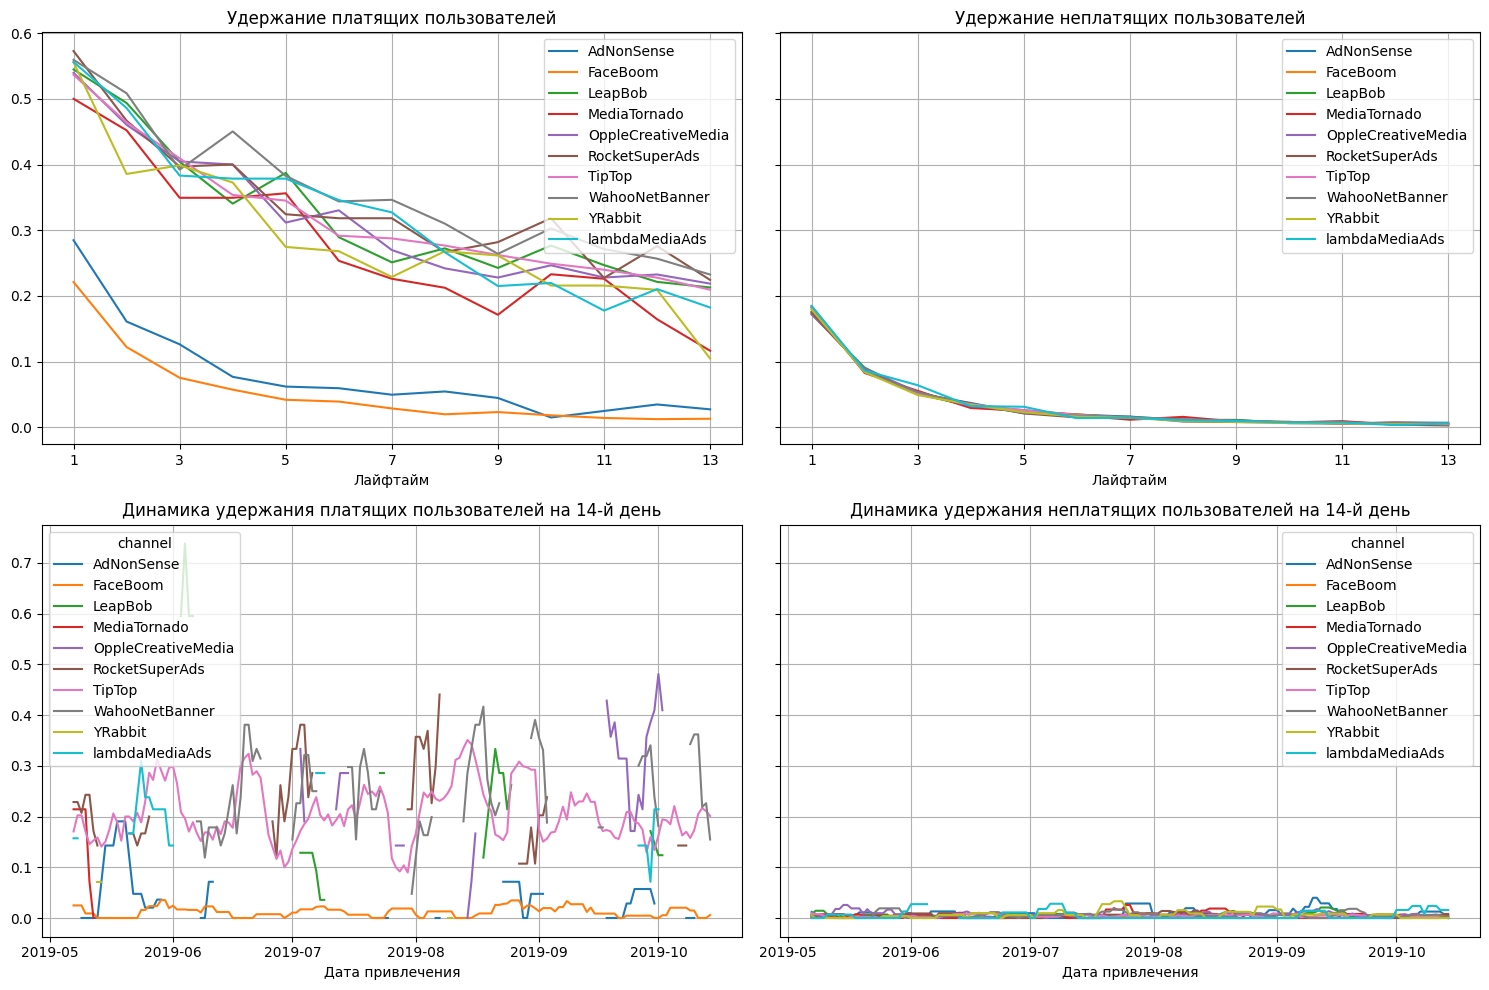

In [51]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**
- Рост стоимости привлечения пользователей через канал TipTop значительно опережает все остальные каналы.
- Реклама окупается через все каналы кроме TipTop, AdNonSense, FaceBoom, при чем два из них являются крупнейшими каналами привлечения пользователей.
- Также удержание платящих пользователей, пришедших через каналы AdNonSence и FaceBoom самое низкое - приближается к 0 на 14 день.


### Анализ окупаемости рекламы в США

Анализ окупаеомсти рекламы по странам показал, что США единственная страна, где ROI меньше 1. Также мы помним, что более 80% рекламного бюджета направлено именно на США. Проведем анализ LTV, CAC и ROI именно для США, чтобы понять причины проблем.

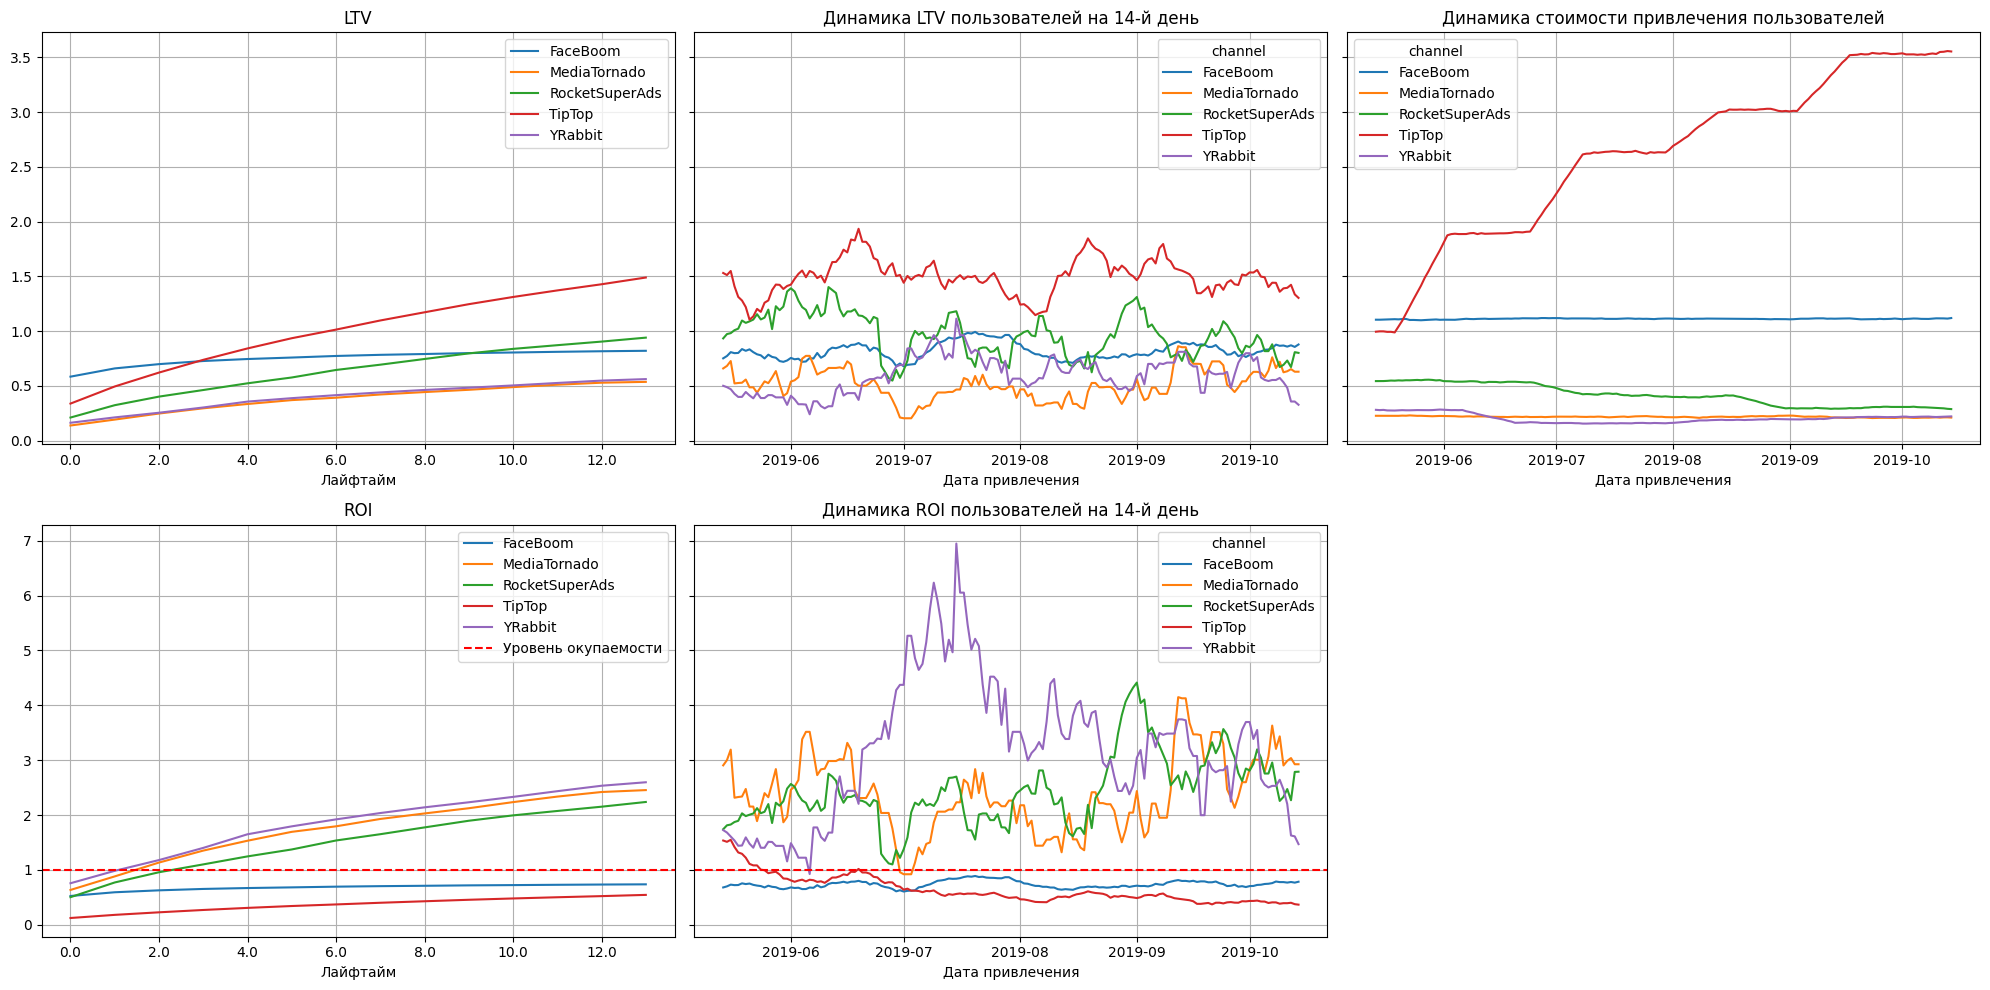

In [52]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

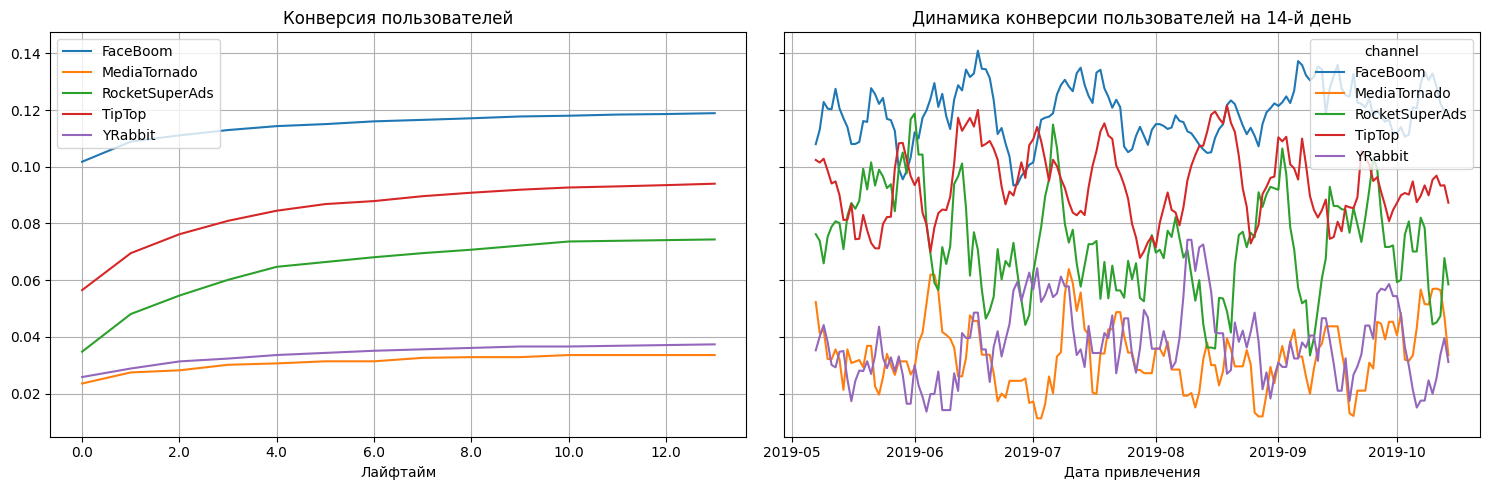

In [53]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

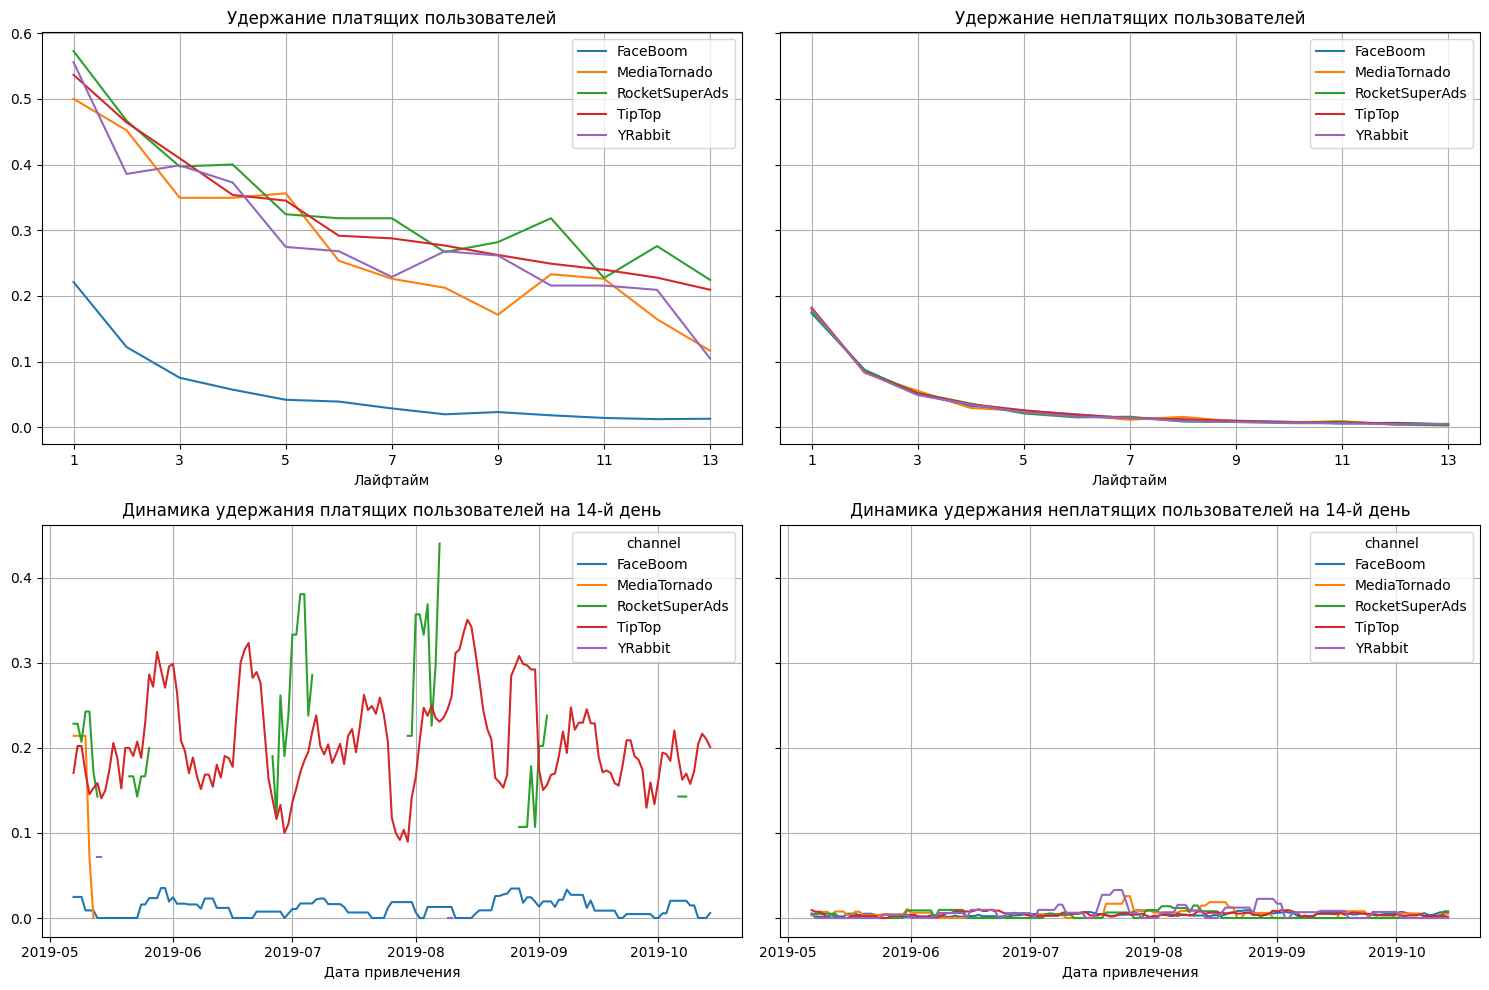

In [54]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**
- Вложения в рекламу через каналы TipTop и Faceboom не окупаются.
- Стоимость привлечения пользователей через TipTop резко растет в рассматриваемом периоде, при этом LTV пользователей через этот канал не меняется, соответственно ROI снижается в динамике.
- Удержание платящих пользователей, привлеченных через FaceBoom значительно меньше, чем у других каналов и сводится примерно к 0 на 14 день.

### Анализ окупаемости рекламы в Европе

Отдельно проанализируем окупаемость рекламы в Европе, чтобы выделить самые прибыльные каналы.

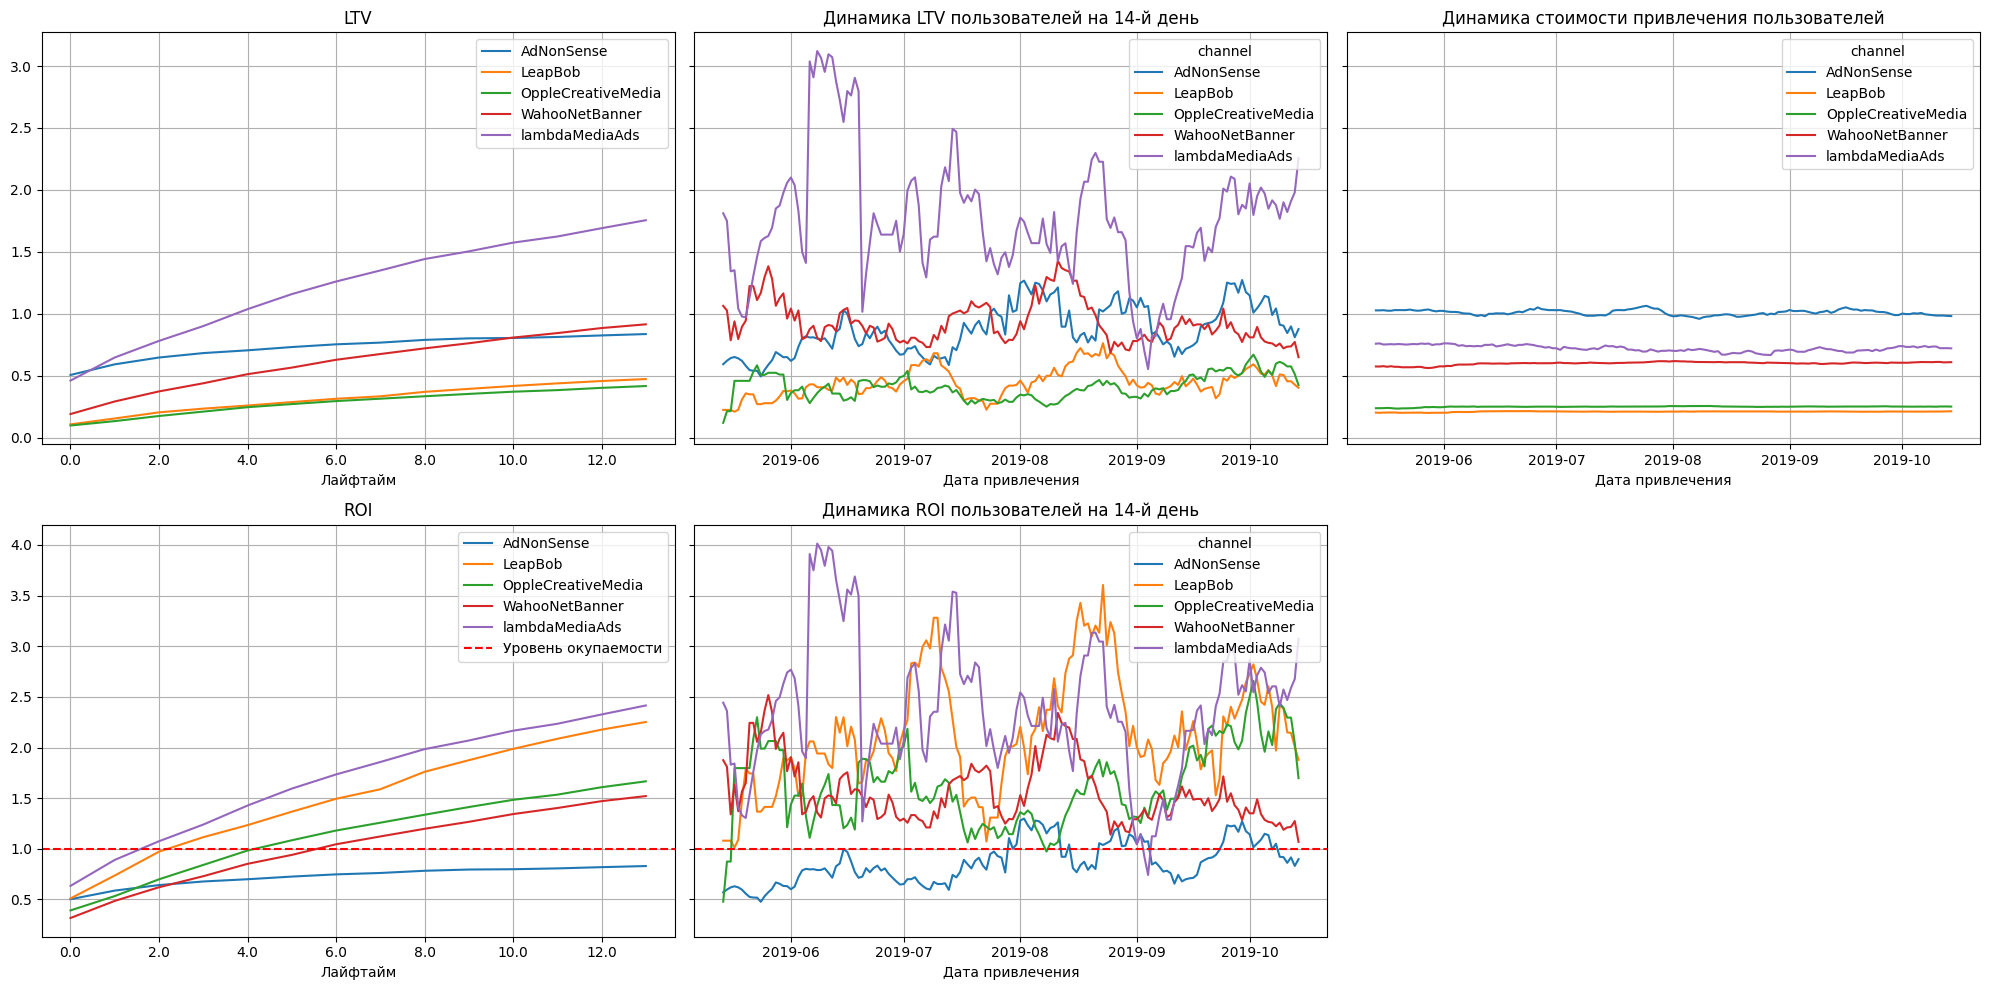

In [55]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

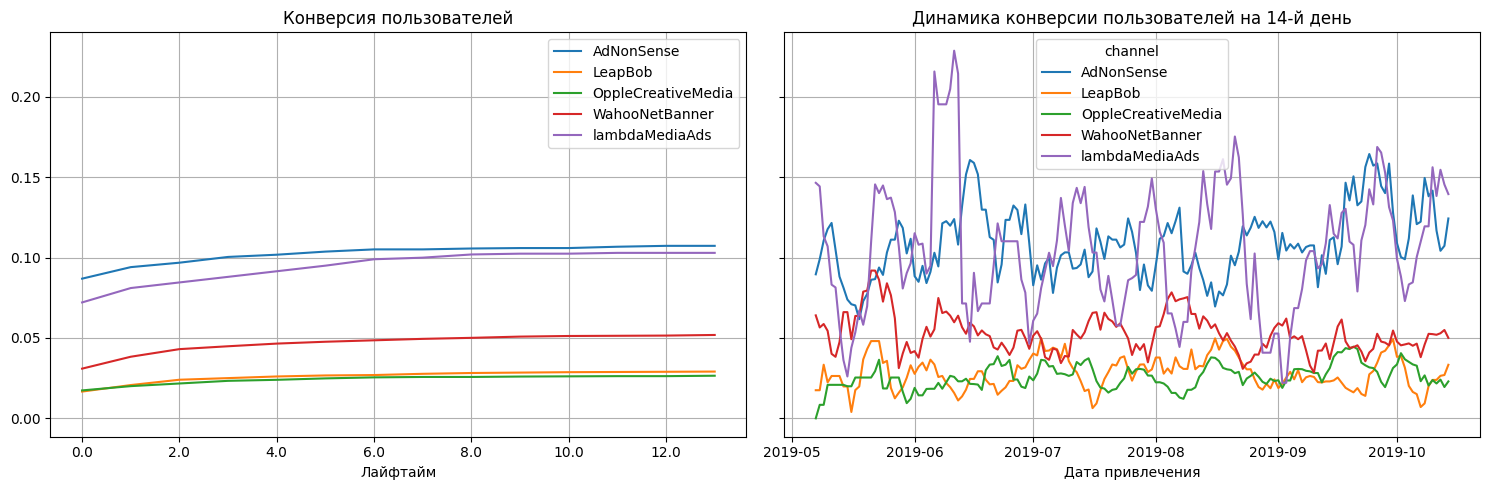

In [56]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_wo_org.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

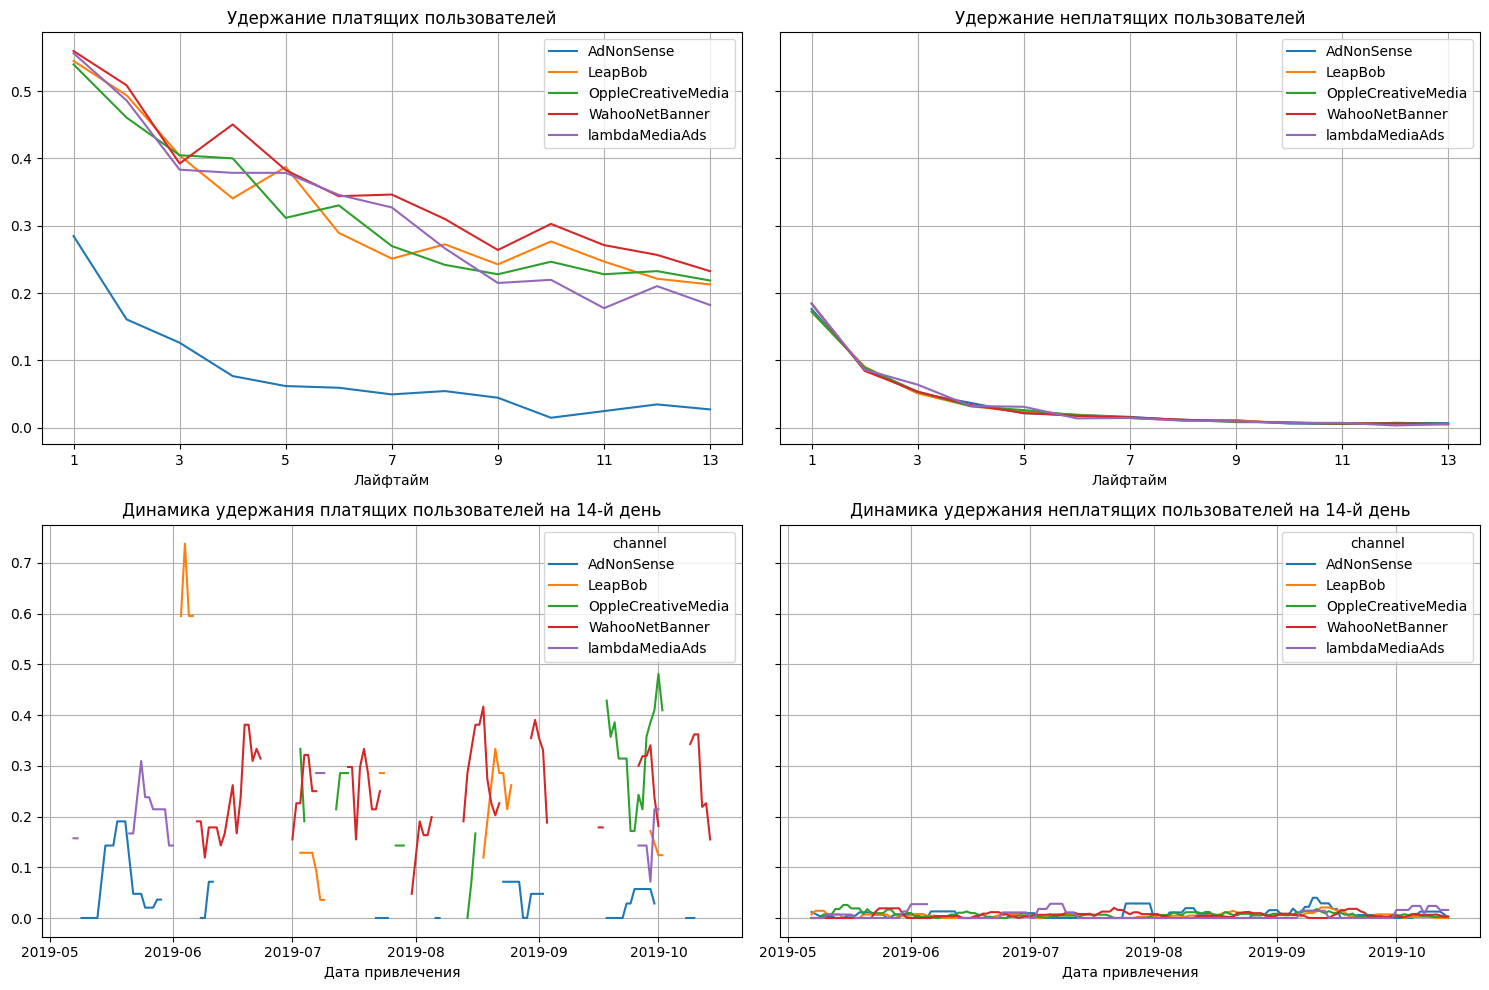

In [57]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_wo_org.query('region != "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

**Выводы:**
- Вложения в рекламу через канал AdNonSense не окупаются.
- Реклама через канал lambdaMediaAds имеет самые высокие показатели LTV, ROI, конверсии в пользователей, но при этом самое плохое удержание платящих пользователей.
- Также отдельно отметим канал LeapBob, который имеет самую низкую стоимость привлечения пользователей, высокий показатель ROI - чуть ниже, чем у lambdaMediaAds и высокую степень удержания платящих пользователей.

[Оглавление](#section_id7)

## Результаты исследования
<a id='section_id6'></a>

**Причины неэффективности привлечения пользователей**

- В качестве главной причиной неэффективности привлечения пользователей можно выделить направление более 80% бюджета на каналы TipTop и FaceBoom, которые не окупаются.
- Затраты на одного пользователя через канал TipTop значительно выросли за анализируемый период, при этом это не сказалось на LTV.
- Удержание платящих пользователей, пришедших через какнал FaceBoom значительно ниже, чем через другие каналы и сводится к 0 на 14 день жизни пользователя.
- В Европе не окупаются вложения в рекламу через канал AdNonSense. Хорошим каналом для привлечения пользователей является lambdaMediaAds, который имеет высокий показатель ROI, LTV и конверсии, но низкий удержания пользователей. Альтернативной ему может служить канал LeapBob, который приносит не так много денег, имеет низкую конверсию, но имеет стабильный ROI больше 1 на протяжении всего анализируемого периода и хороший уровень удержания платящих польователей.
- Единственным устройством, имеющим ROI больше 1 является PC. Но и он в динамике становится убыточным.

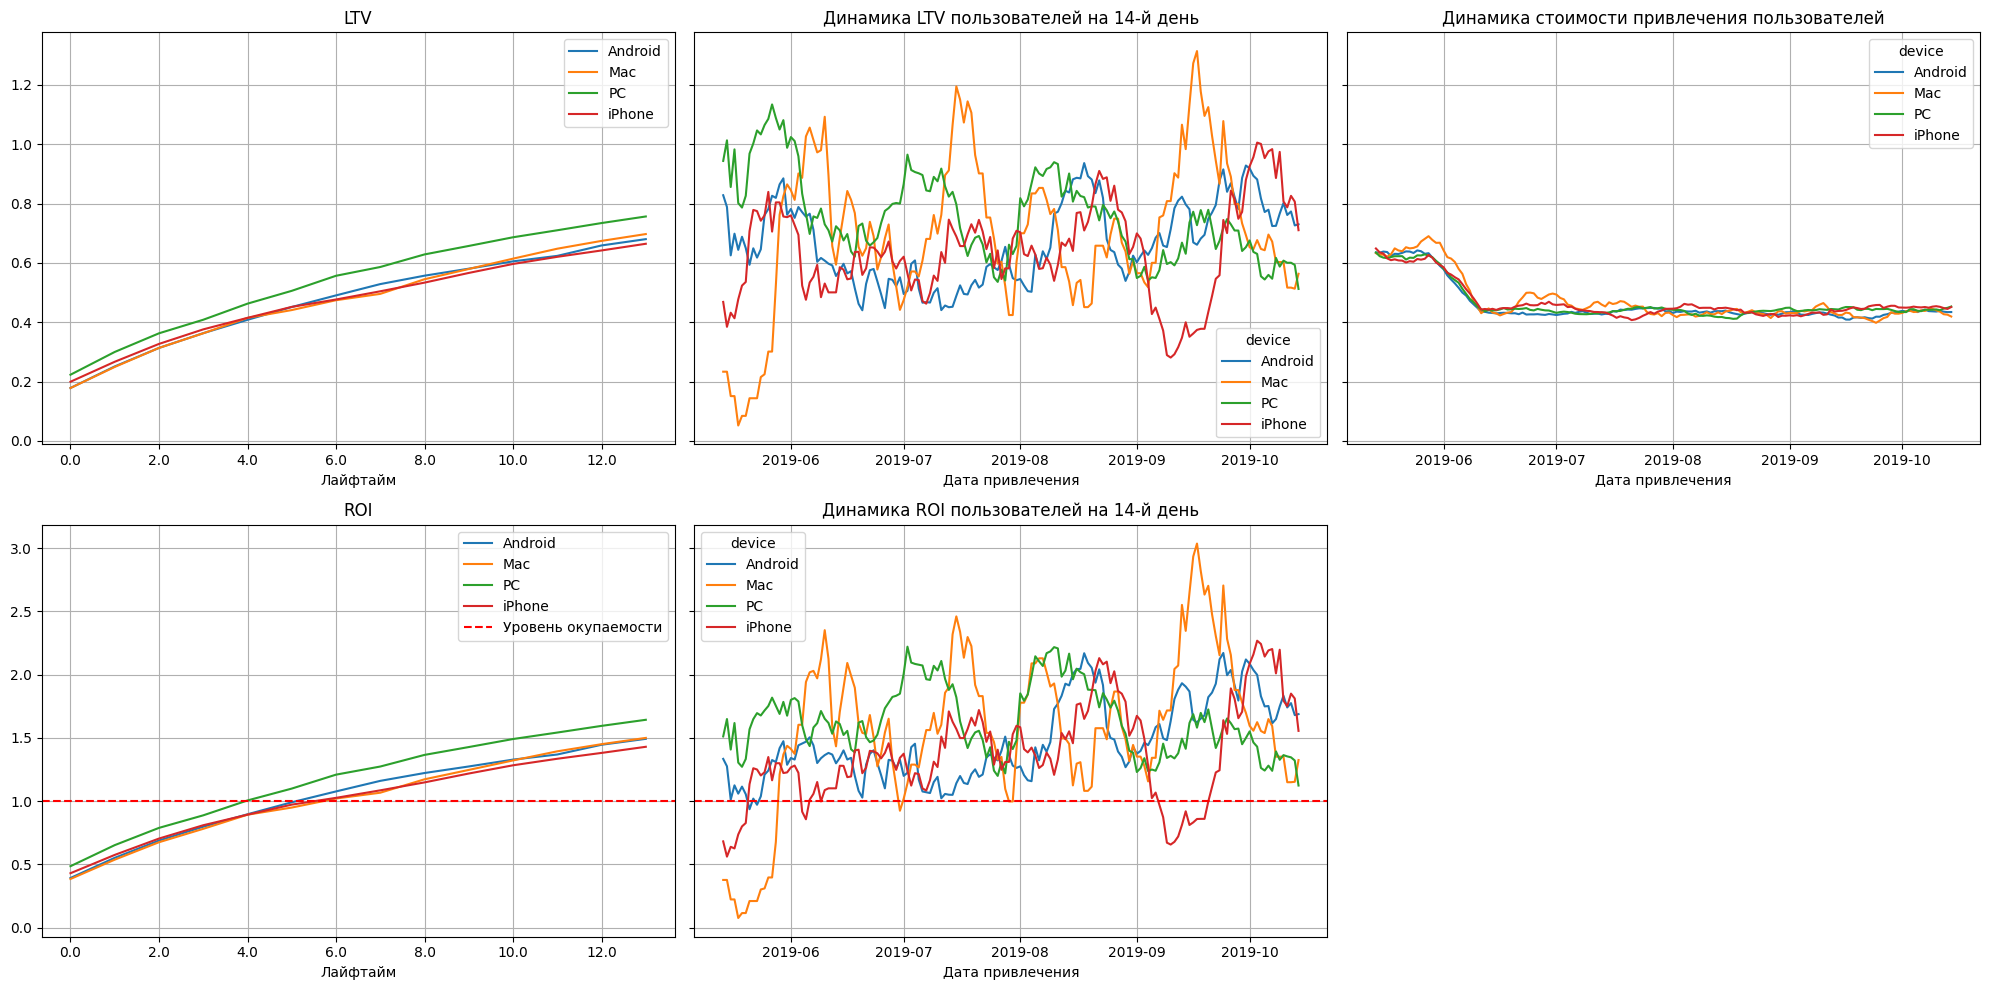

In [58]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_wo_org.query('region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

**Рекомендации для отдела маркетинга**

- Рассмотреть вариант перераспределения маркетингового бюджета на привлечение клиентов в Европейских странах, т.к. затраты на рекламу в них стабильно окупаются. В Европе стоит обратить внимание на канал lambdaMediaAds, показатели ROI которого выше, чем у других.
- При необходимости расширения аудитории в США обратить внимание на другие каналы, такие как RocketSuperAds, у которых ROI примерно одинаковый, стабильный уровень стоимости привлечения пользователя и LTV.

[Оглавление](#section_id7)